In [5]:
from pathlib import Path
import os
workdir = Path("/ibstorage/anthony/NYS_Wetlands_GHG/")
print(workdir)
os.chdir(workdir)
current_working_dir = Path.cwd()
print(f"Current working directory is now: {current_working_dir}")

/ibstorage/anthony/NYS_Wetlands_GHG
Current working directory is now: /ibstorage/anthony/NYS_Wetlands_GHG


In [6]:
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [7]:
# === FILE PATHS ===
naip_path = "Data/NAIP/HUC_NAIP_Processed/cluster_208_huc_041402011002_NAIP_metrics.tif"
labels_path = "Data/Training_Data/cluster_208_huc_041402011002_labels.tif"

# === LOAD DATA ===
with rasterio.open(naip_path) as src:
    r = np.nan_to_num(src.read(1) / 255.0, nan=0)
    g = np.nan_to_num(src.read(2) / 255.0, nan=0)
    b = np.nan_to_num(src.read(3) / 255.0, nan=0)
    rgb = np.dstack([r, g, b])

with rasterio.open(labels_path) as src:
    labels = src.read(1)

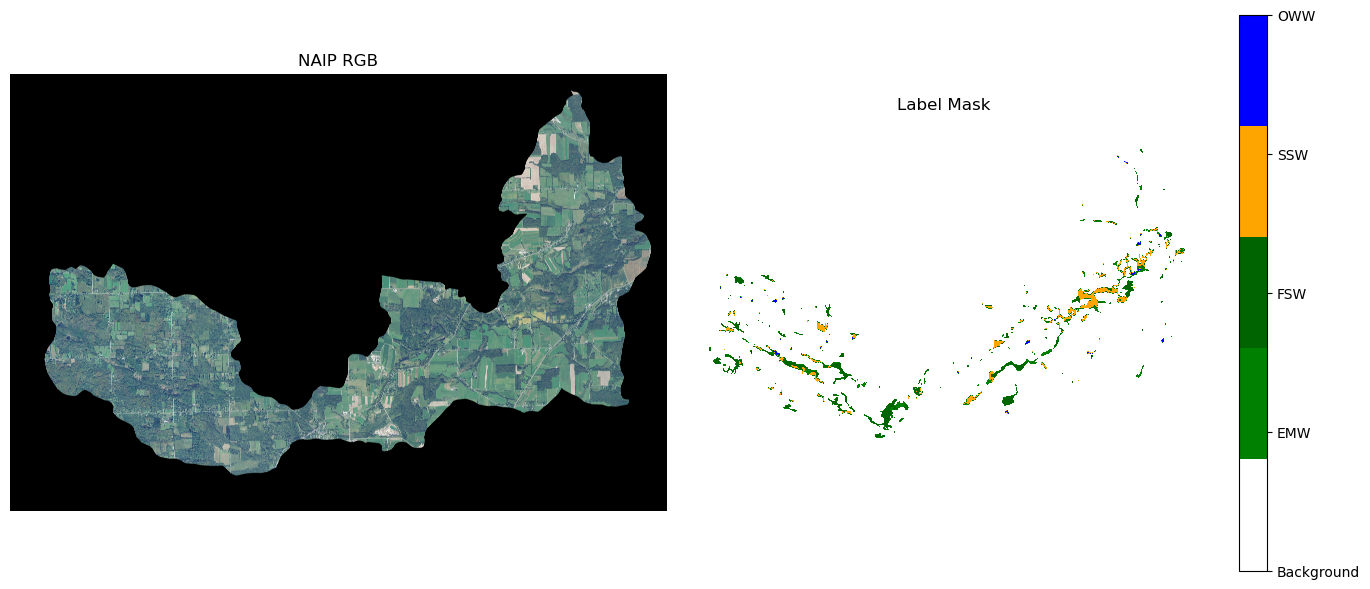

In [8]:
# === PLOT FULL EXTENT ===
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].imshow(rgb)
axes[0].set_title("NAIP RGB")
axes[0].axis('off')

# Custom colormap for classes
colors = ['white', 'green', 'darkgreen', 'orange', 'blue']
cmap = ListedColormap(colors)

im = axes[1].imshow(labels, cmap=cmap, vmin=0, vmax=4)
axes[1].set_title("Label Mask")
axes[1].axis('off')

cbar = plt.colorbar(im, ax=axes[1], ticks=[0, 1, 2, 3, 4])
cbar.ax.set_yticklabels(['Background', 'EMW', 'FSW', 'SSW', 'OWW'])

plt.tight_layout()
plt.savefig("label_verification.png", dpi=150)
plt.show()